In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/rossmann_features.csv")
df['Date'] = pd.to_datetime(df['Date'])


In [2]:
global_daily = (
    df.groupby('Date')['Sales']
      .sum()
      .reset_index()
      .sort_values('Date')
)


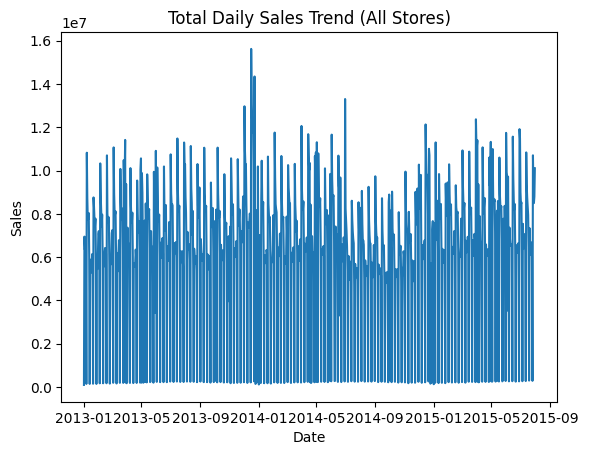

In [3]:
plt.figure()
plt.plot(global_daily['Date'], global_daily['Sales'])
plt.title("Total Daily Sales Trend (All Stores)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


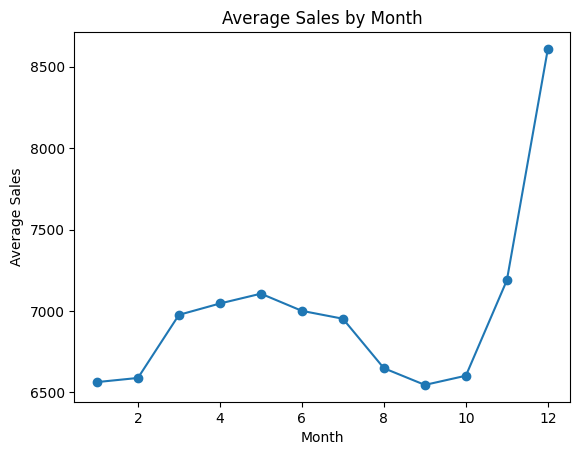

In [4]:
monthly_sales = (
    df.groupby('Month')['Sales']
      .mean()
      .reset_index()
)

plt.figure()
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


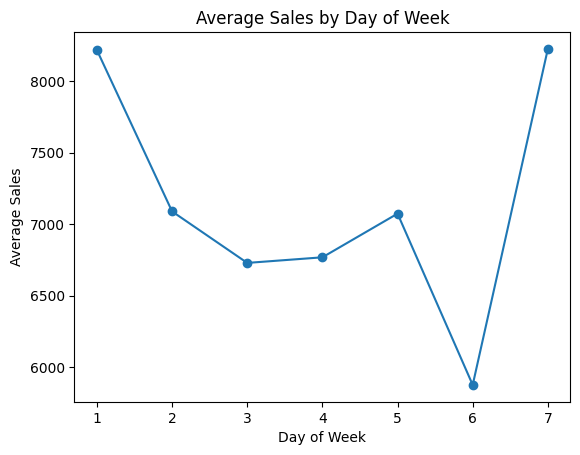

In [5]:
dow_sales = (
    df.groupby('DayOfWeek')['Sales']
      .mean()
      .reset_index()
)

plt.figure()
plt.plot(dow_sales['DayOfWeek'], dow_sales['Sales'], marker='o')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.show()


In [6]:
promo_effect = (
    df.groupby('Promo')['Sales']
      .mean()
      .reset_index()
)

promo_effect


,Promo,Sales
0,0,5929.407603
1,1,8228.281239


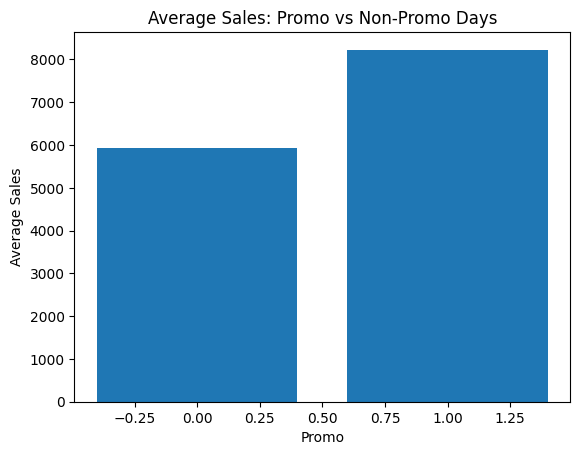

In [7]:
plt.figure()
plt.bar(promo_effect['Promo'], promo_effect['Sales'])
plt.title("Average Sales: Promo vs Non-Promo Days")
plt.xlabel("Promo")
plt.ylabel("Average Sales")
plt.show()


In [8]:
promo2_effect = (
    df.groupby('IsPromo2Active')['Sales']
      .mean()
      .reset_index()
)

promo2_effect


,IsPromo2Active,Sales
0,0,7193.305522
1,1,6581.298763


In [9]:
holiday_effect = (
    df.groupby('IsStateHoliday')['Sales']
      .mean()
      .reset_index()
)

holiday_effect


,IsStateHoliday,Sales
0,0,6992.158856
1,1,6718.453613


In [10]:
storetype_sales = (
    df.groupby('StoreType')['Sales']
      .mean()
      .reset_index()
)

assortment_sales = (
    df.groupby('AssortmentLevel')['Sales']
      .mean()
      .reset_index()
)


In [11]:
store_counts = df.groupby('Store')['Date'].count()
store_id = store_counts.idxmax()
store_id


np.int64(85)

In [12]:
store_df = df[df['Store'] == store_id].sort_values('Date')


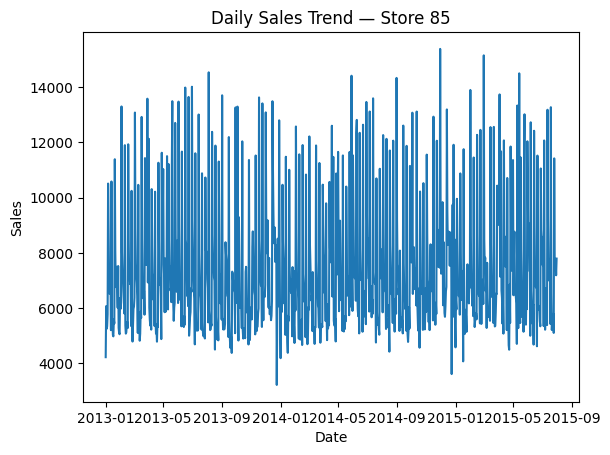

In [13]:
plt.figure()
plt.plot(store_df['Date'], store_df['Sales'])
plt.title(f"Daily Sales Trend — Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
